# Jaccard index computation between shape files
## Version using the 'performance' package from Satsense

This notebook illustrates the calculation of the Jaccard index between slums shape file (denoting the municipality ground truth for the slums in Kalyan, India) and modified one simulating a segmentaion/prediction result.

### Python package imports 

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

import fiona
#from fiona import collection as ficol
#from descartes import PolygonPatch

from shapely.geometry import MultiPolygon, shape
from satsense.util.shapefile import show_multipolygon as shmp # visualization of multipolygons
from satsense.performance.jaccard_similarity import jaccard_index_multipolygons as jim # jaccard index computation

### Visualization parameters

In [2]:
RED = '#FF0000'
GREEN = '#008000'
GOLD = '#FFD700'
MAGENTA = '#FF00FF'
offset = 100
alpha = 0.8
alpha_over = 0.5
offset = 100

## Load shapefiles from disk

Paths and filenames

In [3]:
# data paths
TEST_SHAPE_PATH = "/home/elena/DynaSlum/Data/Kalyan/test/"

# masks filename
slums_shape_fname = "slums_municipality_made_valid.shp"
test_shape_fname1 = "slums_municipality_modified1.shp" # some slums are removed
test_shape_fname2 = "slums_municipality_modified2.shp" # modified some nodes from slum boundaries

# masks full filenames
truth_slums_shape_fullfname = os.path.join(TEST_SHAPE_PATH, slums_shape_fname)
test_slums_shape_fullfname1 = os.path.join(TEST_SHAPE_PATH, test_shape_fname1)
test_slums_shape_fullfname2 = os.path.join(TEST_SHAPE_PATH, test_shape_fname2)

print("Full truth shape filename: ", truth_slums_shape_fullfname)
print("Full test shape filename1: ", test_slums_shape_fullfname1)
print("Full test shape filename2: ", test_slums_shape_fullfname2)

Full truth shape filename:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_made_valid.shp
Full test shape filename1:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_modified1.shp
Full test shape filename2:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_modified2.shp


Load data and display the bounds

In [4]:
fp = fiona.open(truth_slums_shape_fullfname)
bounds = fp.bounds
xmin, ymin, xmax, ymax = bounds
print("xmin: ", xmin, "xmax: ", xmax, "ymin: ", ymin, "ymax: ", ymax)
fp.close()

xmin:  297328.6765506615 xmax:  300732.35364115785 ymin:  2123671.144477916 ymax:  2127839.1117448886


From the bounds define the figure axes limits

In [5]:
extent = int(xmin) - offset, int(ymin) - offset, int(xmax) + offset, int(ymax) + offset
print(extent)

(297228, 2123571, 300832, 2127939)


## Load the contents of the shapefiles as multipolygons.

In [6]:
truth_multi = MultiPolygon([shape(pol['geometry']) for pol in fiona.open(truth_slums_shape_fullfname)])
test1_multi = MultiPolygon([shape(pol['geometry']) for pol in fiona.open(test_slums_shape_fullfname1)])
test2_multi = MultiPolygon([shape(pol['geometry']) for pol in fiona.open(test_slums_shape_fullfname2)])

Verify if the multipolygons are valid.

In [7]:
print(truth_multi.is_valid)

True


In [8]:
print(test1_multi.is_valid)

True


In [9]:
print(test2_multi.is_valid)

True


### Display the multipolygons 

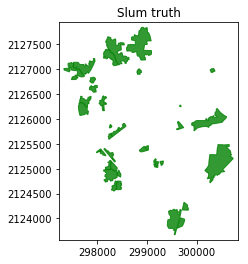

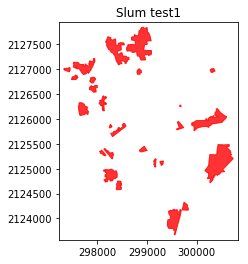

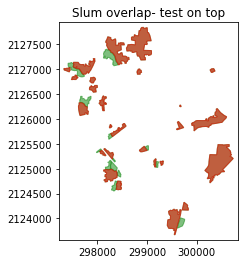

In [10]:
_, ax1 = plt.subplots()
_, ax2 = plt.subplots()
_,ax3 = plt.subplots()
ax1 = shmp(truth_multi, ax1, False, extent, GREEN, alpha,'Slum truth')
ax2 = shmp(test1_multi, ax2, False, extent, RED, alpha,'Slum test1')
ax3 = shmp(truth_multi, ax3, False, extent, GREEN, alpha_over,'')
ax3 = shmp(test1_multi, ax3, False, extent, RED, alpha_over, 'Slum overlap- test on top')

plt.show();



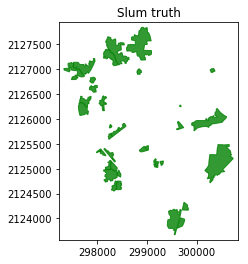

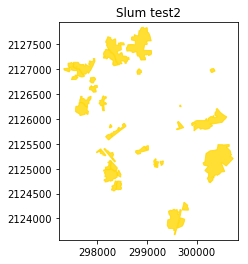

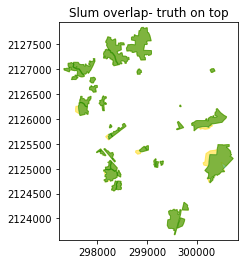

In [11]:
_, ax4 = plt.subplots()
_, ax5 = plt.subplots()
_,ax6 = plt.subplots()
ax4 = shmp(truth_multi, ax4, False, extent, GREEN, alpha,'Slum truth')
ax5 = shmp(test2_multi, ax5, False, extent, GOLD, alpha,'Slum test2')
ax6 = shmp(test2_multi, ax6, False, extent, GOLD, alpha_over, '')
ax6 = shmp(truth_multi, ax6, False, extent, GREEN, alpha_over,'Slum overlap- truth on top')

plt.show();

## Calculate the Jaccard index between few combinaitons of slum multipolygons.

In [12]:
print("The Jaccard Index between multipolygons 'truth' and 'test1': ")
jim(truth_multi, test1_multi)

The Jaccard Index between multipolygons 'truth' and 'test1': 


0.8524204098474798

In [13]:
print("The Jaccard Index between multipolygons 'truth' and 'test2': ") 
jim(truth_multi, test2_multi)

The Jaccard Index between multipolygons 'truth' and 'test2': 


0.9358072812173733

In [14]:

print("The Jaccard Index between multipolygons 'test1' and 'test2': ")
jim(test1_multi, test2_multi)

The Jaccard Index between multipolygons 'test1' and 'test2': 


0.7979681766027388